# LAB4 : Implement Decision tree algorithm for classification

## Import Libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import Dataset

In [62]:
dataset =  pd.read_csv('bankloan.csv')

## EDA Steps

In [63]:
dataset.head()

,Age,Experience,Income,Loan
0,60,34,52000,0
1,47,23,89000,0
2,62,36,63000,0
3,48,23,84000,1
4,61,36,44000,0


In [64]:
dataset.shape

(1166, 4)

In [65]:
dataset.columns

Index(['Age', 'Experience', 'Income', 'Loan'], dtype='object')

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         1166 non-null   int64
 1   Experience  1166 non-null   int64
 2   Income      1166 non-null   int64
 3   Loan        1166 non-null   int64
dtypes: int64(4)
memory usage: 36.6 KB


In [67]:
dataset.describe()

,Age,Experience,Income,Loan
count,1166.000000,1166.000000,1166.000000,1166.000000
mean,45.870497,20.674099,78301.886792,0.122642
std,11.198691,11.187215,49623.455411,0.328166
min,23.000000,-3.000000,8000.000000,0.000000
25%,36.000000,11.000000,38250.000000,0.000000
50%,46.000000,21.000000,69000.000000,0.000000
75%,56.000000,30.000000,111000.000000,0.000000
max,67.000000,43.000000,204000.000000,1.000000


## Preprocessing Steps

In [68]:
# Step 1 : Seprate input and output variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [69]:
print(X)

[[    60     34  52000]
 [    47     23  89000]
 [    62     36  63000]
 ...
 [    56     32  90000]
 [    48     23  63000]
 [    55     30 153000]]


In [70]:
# Step 4 : splitting Data inti training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                    test_size = 0.25,
                                    random_state = 0)

In [71]:
print(X_train.shape)
print(X_test.shape)

(874, 3)
(292, 3)


In [72]:
# Step 5 : Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [73]:
print(X_test)

[[-0.37634386 -0.36284671 -0.9373473 ]
 [-0.92580589 -1.00497542  1.00915647]
 [-0.55949787 -0.7297774   1.14406268]
 [-0.28476685 -0.45457938 -1.24570434]
 [ 0.81415722  0.82967805  2.01131683]
 [ 0.26469518  0.37101468 -1.34206591]
 [-0.92580589 -0.91324275 -0.59044564]
 [-0.65107488 -0.63804473  1.93422758]
 [ 1.18046524  1.10487607  0.62371018]
 [-0.10161284 -0.17938136 -1.11079813]
 [ 1.08888823  1.10487607 -0.18572703]
 [-0.74265188 -0.63804473  2.24258461]
 [-1.10895991 -1.0967081  -1.13007045]
 [-1.47526793 -1.37190612  1.0477011 ]
 [ 0.35627219  0.27928201 -0.20499935]
 [ 1.27204224  1.28834142  0.68152713]
 [ 1.18046524  1.19660875  1.81859369]
 [-0.19318985 -0.17938136  0.95133953]
 [-0.65107488 -0.54631205  0.83570564]
 [-1.29211392 -1.28017344 -0.49408407]
 [-0.28476685 -0.17938136  0.21899158]
 [-0.19318985 -0.08764868 -0.35917786]
 [-1.47526793 -1.55537147 -0.95661962]
 [ 0.6310032   0.55448003  0.10335769]
 [ 1.45519626  1.47180677  0.7778887 ]
 [-0.19318985 -0.27111403

### Train the Decision Tree Classification model on the Training set

In [74]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini',random_state= 0)

classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

#### Predicting the Test set results

In [75]:
ypred = classifier.predict(X_test)

#### Compare the predicted and Actual Output

In [76]:
print(np.concatenate((ypred.reshape(len(ypred),1),
                      y_test.reshape(len(y_test),1)),
                     1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]

### Making the Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred)
print(cm)

[[236  14]
 [ 22  20]]


In [78]:
from sklearn.metrics import accuracy_score
print("Test Accuracy =",accuracy_score(y_test,ypred))

Test Accuracy = 0.8767123287671232


#### Build the Classification Report

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       250
           1       0.59      0.48      0.53        42

    accuracy                           0.88       292
   macro avg       0.75      0.71      0.73       292
weighted avg       0.87      0.88      0.87       292



### Visualising the Training set results

#### VISUALIZE TEXT REPRESENTATION

In [80]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_2 <= 0.09
|   |   |--- class: 0
|   |--- feature_2 >  0.09
|   |   |--- feature_1 <= 0.05
|   |   |   |--- feature_2 <= 0.38
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.38
|   |   |   |   |--- feature_2 <= 0.42
|   |   |   |   |   |--- feature_0 <= -1.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  -1.56
|   |   |   |   |   |   |--- feature_0 <= -0.77
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  -0.77
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  0.42
|   |   |   |   |   |--- class: 0
|   |   |--- feature_1 >  0.05
|   |   |   |--- feature_0 <= 0.48
|   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |--- feature_2 <= 0.13
|   |   |   |   |   |   |--- feature_1 <= 0.14
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  0.14
|   |   |   |   |   |   |   |--- feature_0 <= 0.21
|   |   |   |   |

### Visualize the tree

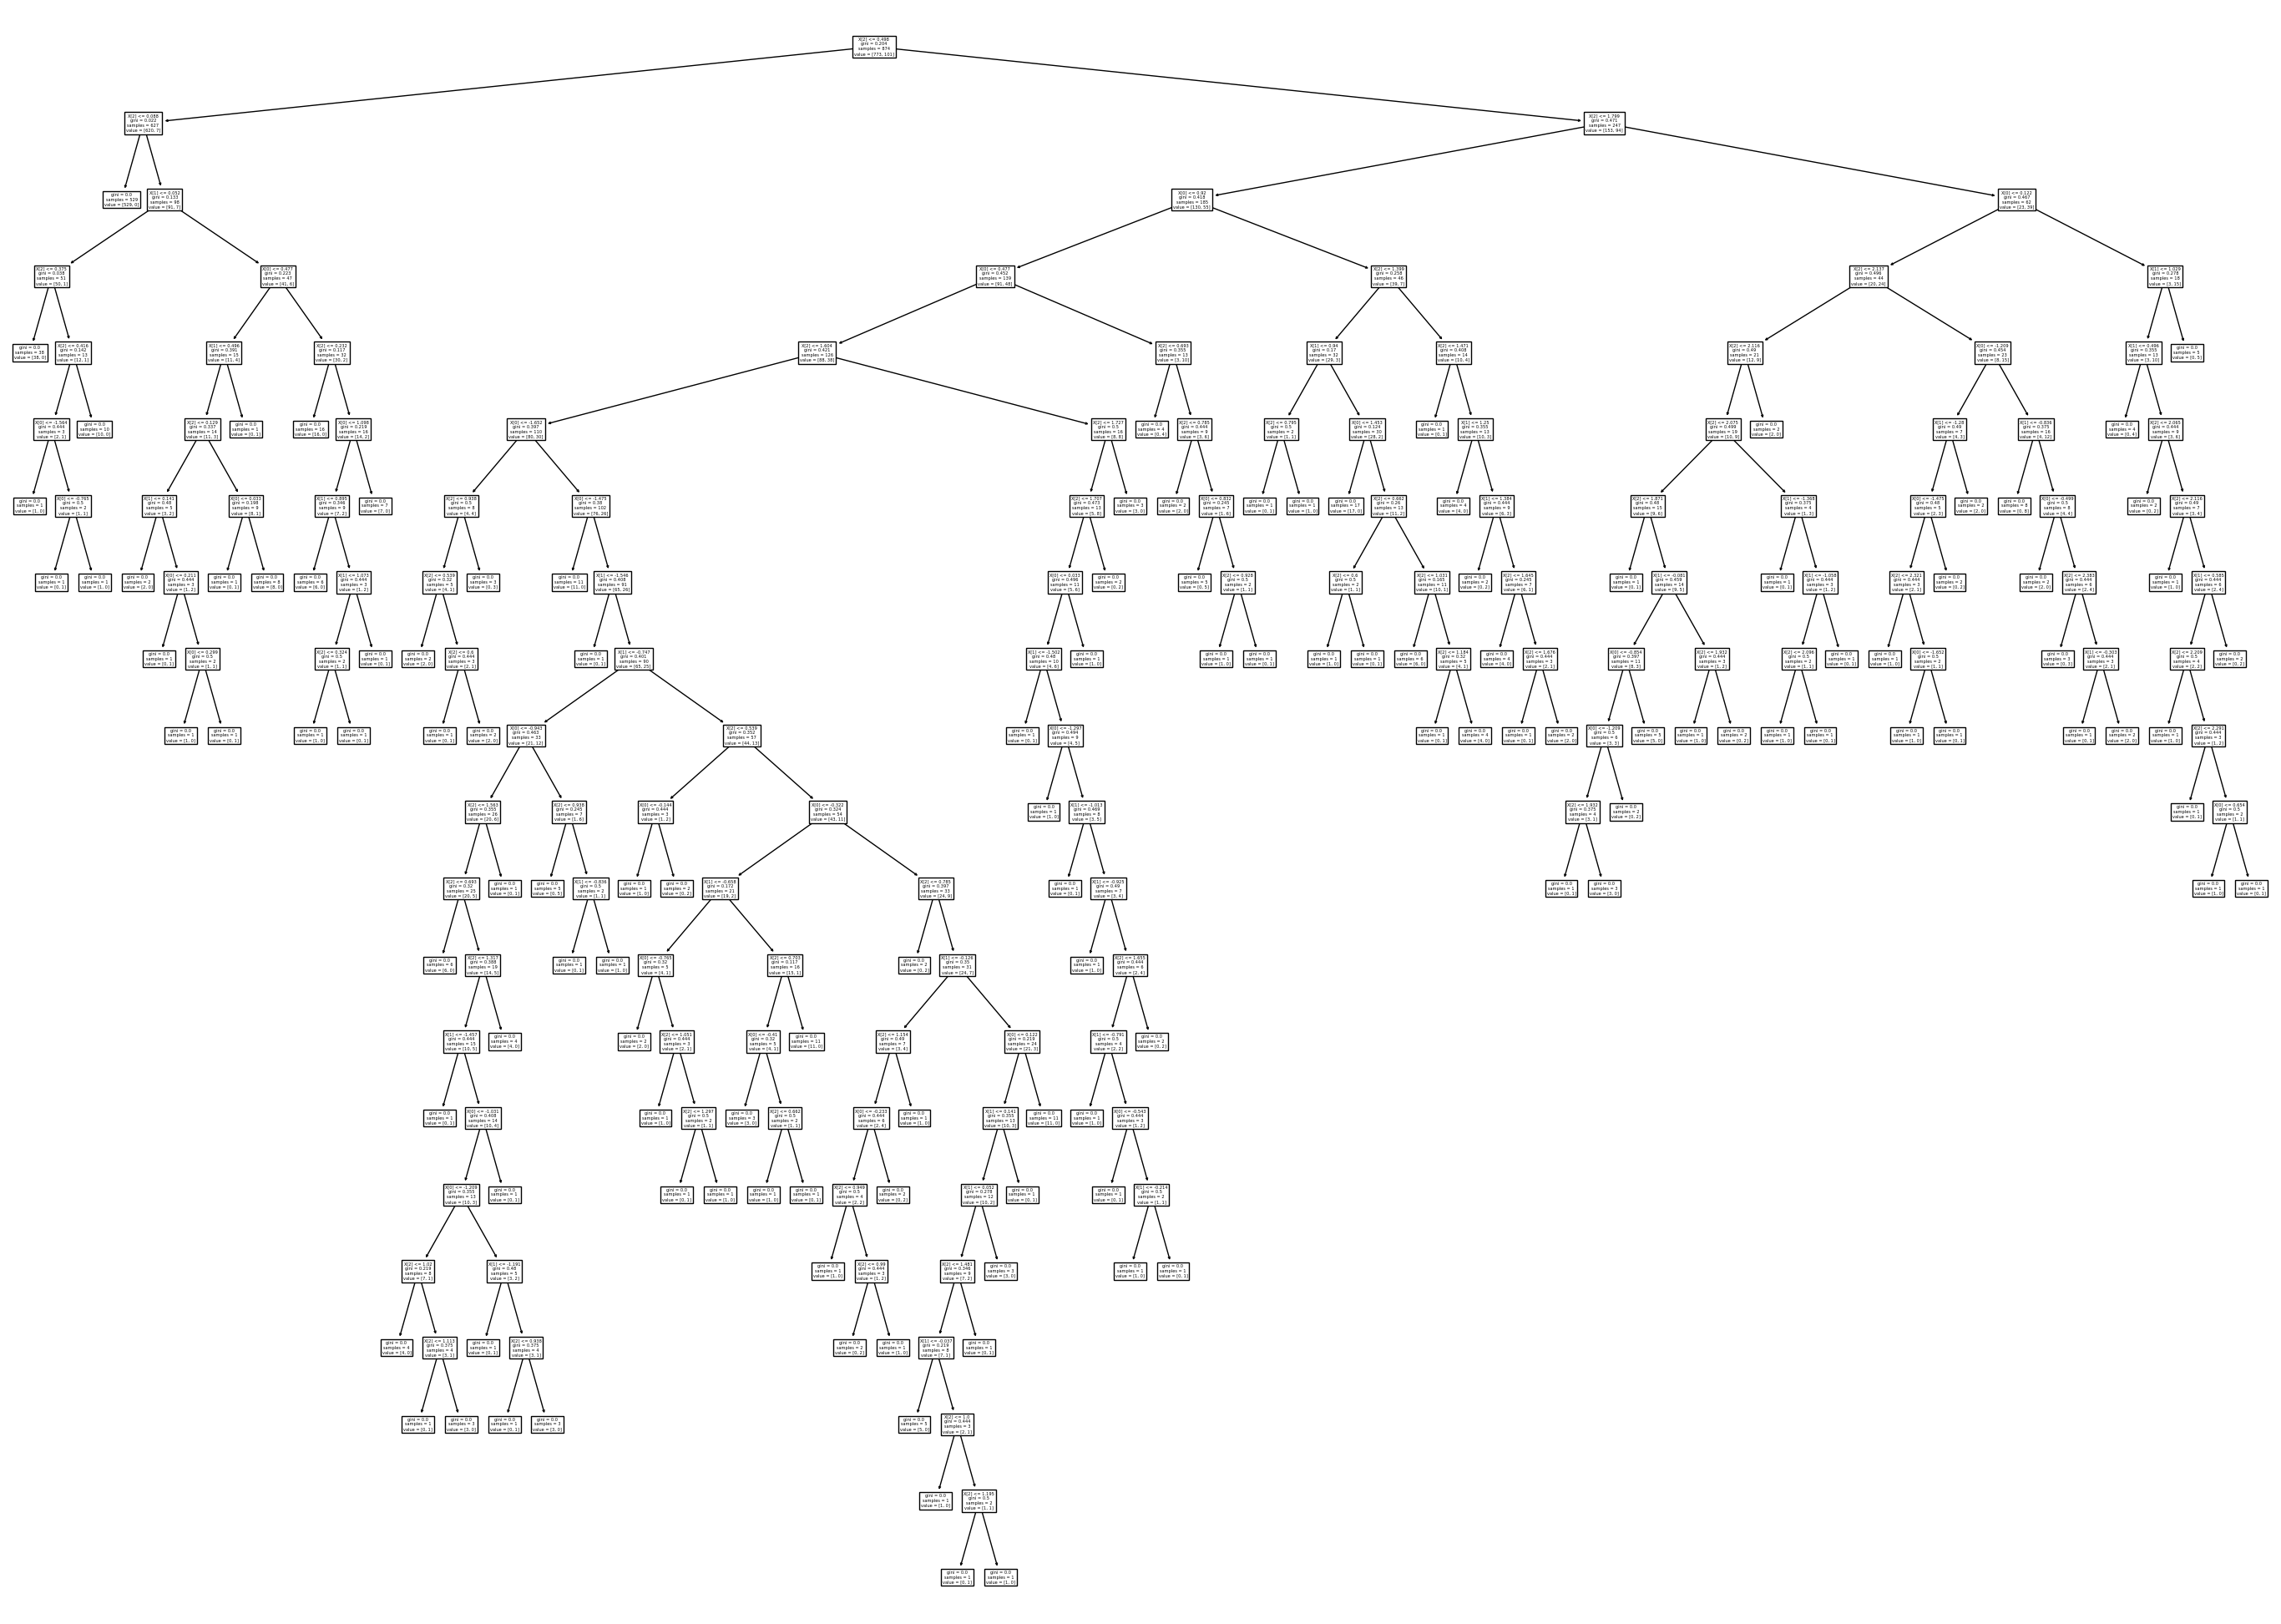

In [81]:
from sklearn import tree
fig = plt.figure(figsize=(35,25))
tree.plot_tree(classifier)
plt.show()

### TASKS

### 1) When criterion = 'gini' , random_state= 0

#### Accuracy is 0.8767123287671232
#### Precision for 0 is 0.91 and for 1 is 0.59
#### Recall for 0 is 0.94 and for 1 is 0.48
#### F1 Score for 0 is 0.93 and for 1 is 0.53

### 2) After Setting Criterion=log_loss,Splitter=random, max_feature=sqrt, random_state=0

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Train the decision tree classifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, splitter='random', max_features='sqrt')
classifier.fit(X_train, y_train)

# Now, let's make predictions on the testing data
y_pred_proba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)  # Class predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Log Loss:", logloss)


Accuracy: 0.8356164383561644
Precision: 0.4166666666666667
Recall: 0.35714285714285715
F1 Score: 0.3846153846153846
Log Loss: 5.677607078615455
